In [1]:
import json

# read jsonl file
path = "/mnt/ssd/Projects/lmms-eval/outputs/hrbench_intern35_2b-think_tqa/OpenGVLab__InternVL3_5-2B/20251005_134859_samples_hrbench4k_tqa.jsonl"
with open(path, "r") as f:
    data = [json.loads(line) for line in f]

print(data[:5])  # print first 5 entries

[{'doc_id': 0, 'target': 'A', 'filtered_resps': ['<think>\nOkay, let\'s see. The question is asking what number is displayed above the entrance where the woman is standing. The options are A to D, with 27B being the first one.\n\nFirst, I need to look back at the context provided. The key part here is the small rectangular sign above the woman\'s head. The description says it has the characters "27B" on a dark background with light-colored numbers and letters. So the sign clearly shows "27B". \n\nWait, the question is about the number displayed above the entrance. The woman is standing at the entrance, and the sign is above her. So the sign\'s number is 27B. The options given are A. 27B, B.37B, C.27D, D.27E. \n\nSo the answer should be A. But let me double-check to make sure there\'s no trick here. The context mentions the address or unit number as "27B" on the sign. The wall shows signs of wear, but that\'s probably just background info. The mailbox is to the right, but that\'s not re

In [2]:
# Reorganize the data entries
reorganized_data = {0: [], 1: []}
for e in data:
    score = e["average"]["gpt_score"]
    reorganized_data[score].append(
        {
            "question": e["input"],
            "target": e["target"],
            "response": e["filtered_resps"][0],
        }
    )

print(reorganized_data[0][0])  # print first entry of score 0

{'question': 'Is the mailbox on the left or right side of the woman?\nA. Right\nB. Directly above\nC. In front\nD. Left\n', 'target': 'A', 'response': '<think>\nOkay, let\'s see. The question is asking whether the mailbox is on the left or right side of the woman. The options are A. Right, B. Directly above, C. In front, D. Left.\n\nFirst, I need to look at the context provided. The woman is standing beside a concrete wall with peeling paint and exposed bricks. She\'s holding a smartphone in her right hand and looking to her left with a contemplative expression. Her left hand is on the wall, and she has a white tote bag over her left shoulder. Behind her, there\'s a blue mailbox mounted on the wall, and a staircase ascends into the darkness above.\n\nSo, the mailbox is behind her. The question is about the position of the mailbox relative to the woman. The options are left, right, directly above, or in front.\n\nThe key here is to figure out the direction. The woman is standing beside 

In [3]:
print(len(reorganized_data[0]), len(reorganized_data[1]))  # print lengths of both lists

651 149


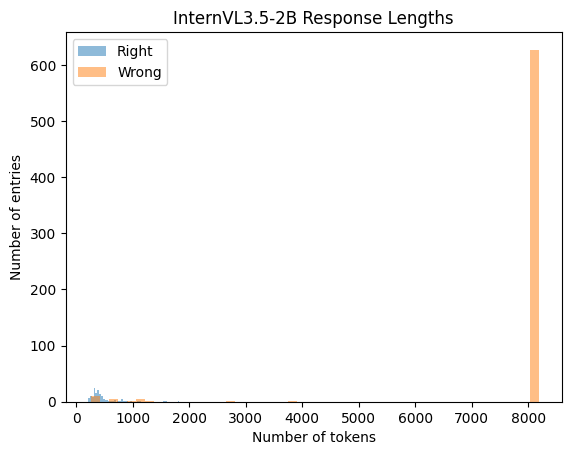

In [5]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("OpenGVLab/InternVL3_5-2B")
# draw histogram of lengths
import matplotlib.pyplot as plt

lengths_0 = []
lengths_1 = []
for score in [0, 1]:
    for entry in reorganized_data[score]:
        input_text = entry["question"] + " " + entry["response"]
        tokens = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=8192)
        if score == 0:
            lengths_0.append(tokens.input_ids.shape[1])
        else:
            lengths_1.append(tokens.input_ids.shape[1])

plt.hist(lengths_1, bins=50, alpha=0.5, label="Right")
plt.hist(lengths_0, bins=50, alpha=0.5, label="Wrong")
# Make y-axis break
plt.xlabel("Number of tokens")
plt.ylabel("Number of entries")
plt.legend()
plt.title("InternVL3.5-2B Response Lengths")
plt.show()

In [6]:
# find the most used tokens in each score group
from collections import Counter

counter_0 = Counter()
counter_1 = Counter()
for score in [0, 1]:
    for entry in reorganized_data[score]:
        input_text = entry["question"] + " " + entry["response"]
        tokens = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=8192)
        if score == 0:
            counter_0.update(tokens.input_ids[0].tolist())
        else:
            counter_1.update(tokens.input_ids[0].tolist())

for token_id, count in counter_0.most_common(10):
    print(f"Token ID: {token_id}, Count in score 0: {count}, Token: {tokenizer.decode([token_id])}")
for token_id, count in counter_1.most_common(10):
    print(f"Token ID: {token_id}, Count in score 1: {count}, Token: {tokenizer.decode([token_id])}")

Token ID: 279, Count in score 0: 478688, Token:  the
Token ID: 13, Count in score 0: 354705, Token: .
Token ID: 11, Count in score 0: 315443, Token: ,
Token ID: 374, Count in score 0: 227156, Token:  is
Token ID: 13824, Count in score 0: 78999, Token:  Wait
Token ID: 220, Count in score 0: 75915, Token:  
Token ID: 1988, Count in score 0: 73631, Token:  But
Token ID: 4226, Count in score 0: 66611, Token:  answer
Token ID: 525, Count in score 0: 60446, Token:  are
Token ID: 323, Count in score 0: 56925, Token:  and
Token ID: 279, Count in score 1: 10384, Token:  the
Token ID: 13, Count in score 1: 8668, Token: .
Token ID: 11, Count in score 1: 5451, Token: ,
Token ID: 374, Count in score 1: 4653, Token:  is
Token ID: 576, Count in score 1: 3348, Token:  The
Token ID: 389, Count in score 1: 2059, Token:  on
Token ID: 264, Count in score 1: 2021, Token:  a
Token ID: 315, Count in score 1: 1832, Token:  of
Token ID: 304, Count in score 1: 1609, Token:  in
Token ID: 220, Count in score 1: 1